2)Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма bagging на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. Получить графики зависимостей от других параметров моделей.

In [18]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

In [27]:
%matplotlib inline
df=pd.read_csv(r"ORGANICS.csv",encoding="cp1251")

In [28]:
df = df.fillna(df.mean())

In [39]:
X = df4[['DemAffl','DemAge','DemCluster','PromSpend','PromTime']]
y=df.values[::,11].astype('float64')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
trees_grid = [i for i in range(1, 302, 10)]

In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = BaggingClassifier(n_estimators=ntrees, n_jobs=-1, oob_score=True)
    temp_test_acc = []
    rfc.fit(X_train, y_train)
    temp_test_acc.append(rfc.score(X_test, y_test))
    test_acc.append(temp_test_acc)
    
test_acc = np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 78.04% with 261 trees


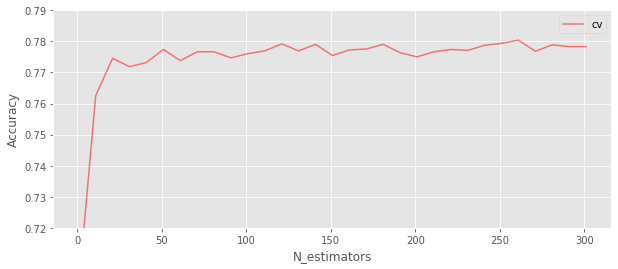

In [44]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 4))
#ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.72,0.79])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Начиная с 71 дерева точность практически не меняется и придерживается 0,77, поэтому оптимальное количество деревьев 101

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
max_samples_grid = [i for i in range(1, 80, 3)]

# Обучаем на тренировочном датасете
for max_samples in max_samples_grid:
    rfc = BaggingClassifier(n_estimators=261, n_jobs=-1, oob_score=True, max_samples=max_samples)
    temp_test_acc = []
    rfc.fit(X_train, y_train)
    temp_test_acc.append(rfc.score(X_test, y_test))
    test_acc.append(temp_test_acc)
    
test_acc = np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_samples".format(max(test_acc.mean(axis=1))*100, 
                                                        max_samples_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 80.65% with 58 max_samples


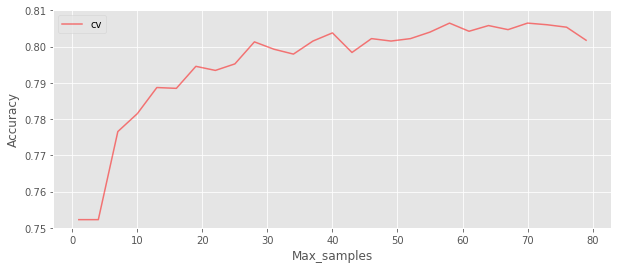

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(max_samples_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.75,0.81])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_samples");